<a href="https://colab.research.google.com/github/amiinmn/Business-Decision-Research/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

## Import Libarary yang diperlukan





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score


## Import dan membaca data

In [2]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 

## Data Cleansing



In [3]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000,unit='s', origin='1970-01-01')

## Churn Customers

1.   transaksi paling terakhir kapan dilakukan
2.   klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.



In [4]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[n

## Menghapus kolom yang tidak diperlukan


In [5]:
# Hapus kolom-kolom yang tidak diperlukan
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22    False
1        29531  Sepatu  ...                41    False
2       141526     Tas  ...                30    False
3       141526   Jaket  ...                27    False
4        37545  Sepatu  ...                25    False

[5 rows x 7 columns]


# Visualisasi


## Customer acquisition by year
Langkah berikutnya adalah membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. 




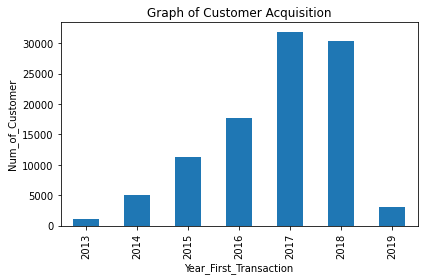

In [6]:
# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Transaction by year

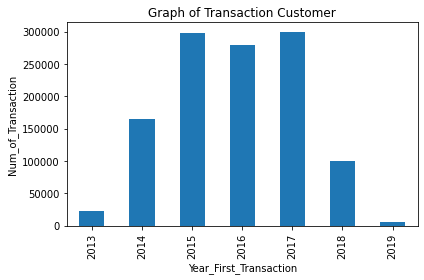

In [7]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

## Average transaction amount by year
Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

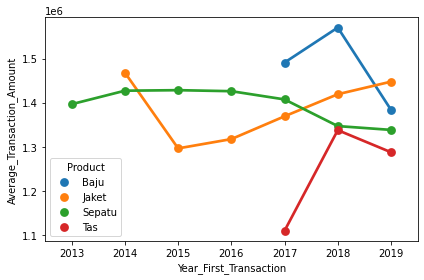

In [8]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

## Proporsi churned customer untuk setiap produk
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.

<Figure size 432x288 with 0 Axes>

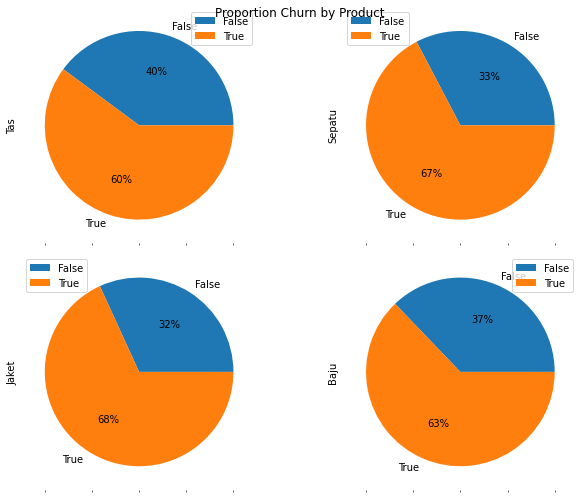

In [9]:
plt.clf()
# Melakukan pivot data dengan pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

## Distribusi kategorisasi count transaction
visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

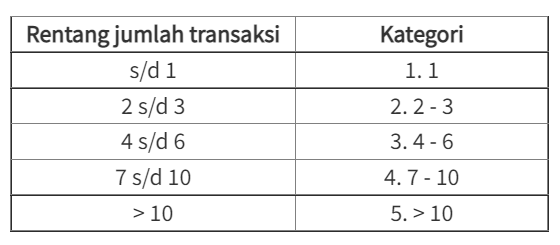

Setelah menambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group, maka visualisasikanlah dengan bar chart. 

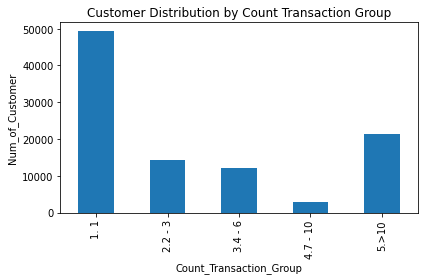

In [10]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2.2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3.4 - 6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4.7 - 10'
    else:
        val ='5.>10'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

## Distribusi kategorisasi average transaction amount
visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:


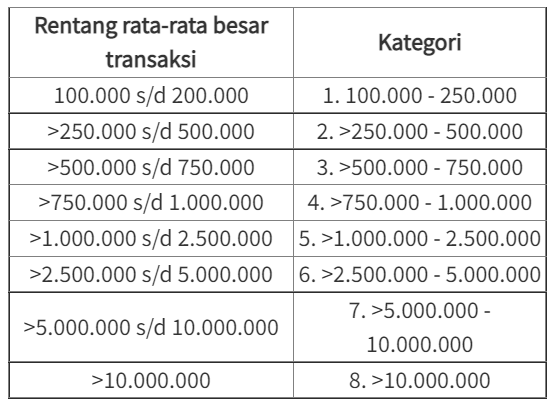

Setelah ditambahkan kolom baru untuk kategori ini dengan nama Average_Transaction_Amount_Group, maka visualisasikanlah dengan bar chart.

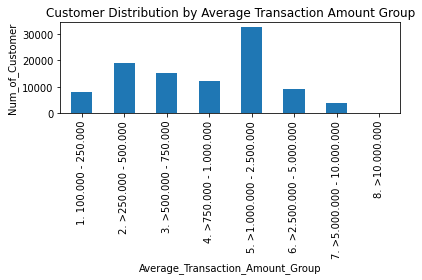

In [11]:
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
        val = '1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <=500000):
        val = '2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <=750000):
        val = '3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <=1000000):
        val = '4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <=2500000):
        val = '5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <=5000000):
        val = '6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <=10000000):
        val = '7. >5.000.000 - 10.000.000'
    else:
        val = '8. >10.000.000'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

# Modeling

## Feature Columns dan Target
Menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X. 

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.

In [12]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
y = df['is_churn'] 
y=y.astype('int')

## Split X dan y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Train, predict dan evaluate
Model menggunakan Logistic Regression, inisialisasilah model, fit, dan kemudian evaluasi model dengan menggunakan confusion matrix.

In [14]:
# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8358]
 [    2 16639]]


## Visualisasi Confusion Matrix
Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

<Figure size 432x288 with 0 Axes>

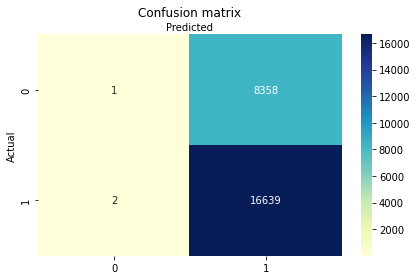

In [15]:
plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## Accuracy, Precision, dan Recall
Perhitungan nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [16]:
#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.6656
Precision: 0.6656
Recall   : 0.6656
